<a href="https://colab.research.google.com/github/Kinnaruo/MachineLearning/blob/main/UTS/Klasifikasi/Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("/content/KlasifikasiUTS.csv")
X = df.drop("Class", axis=1)
y = df["Class"]


X = VarianceThreshold(threshold=0.01).fit_transform(X)

In [28]:
selector = VarianceThreshold(threshold=0.01)
X = selector.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

📌 Logistic Regression
Accuracy : 1.00
Precision: 0.85
Recall   : 0.56
F1 Score : 0.67
AUC      : 0.98


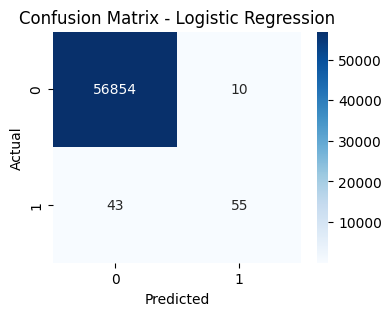

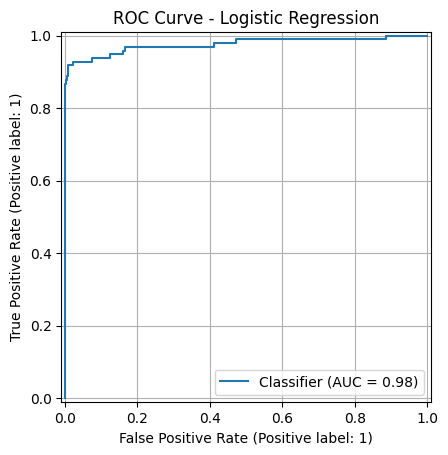

In [29]:
results = {}

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("📌 Logistic Regression")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")

results["Logistic Regression"] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "AUC": auc}
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - Logistic Regression")
plt.grid(True)
plt.show()

Logistic Regression adalah model klasifikasi linier yang digunakan untuk memprediksi probabilitas kelas dalam masalah klasifikasi biner (atau dengan ekstensi, multi-kelas). Model ini menghitung log-odds dari kelas target sebagai kombinasi linier dari fitur input. Karena sifatnya yang sederhana dan interpretatif, Logistic Regression sangat berguna sebagai baseline model atau ketika pemahaman terhadap pengaruh setiap fitur penting. Meski demikian, model ini kurang cocok jika data memiliki relasi non-linier yang kuat antar fitur.

# Decision Tree

📌 Decision Tree
Accuracy : 1.00
Precision: 0.76
Recall   : 0.78
F1 Score : 0.77
AUC      : 0.89


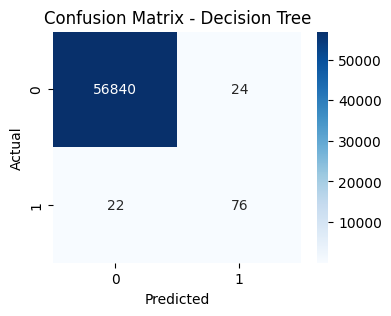

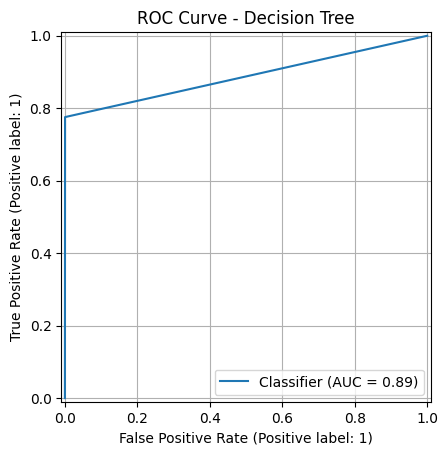

In [30]:
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("📌 Decision Tree")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")

results["Decision Tree"] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "AUC": auc}
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - Decision Tree")
plt.grid(True)
plt.show()

Decision Tree membagi dataset ke dalam cabang-cabang berdasarkan aturan keputusan dari fitur input. Proses pembagian dilakukan dengan memilih fitur yang paling baik memisahkan kelas berdasarkan metrik seperti Gini Index atau Entropy. Model ini mudah diinterpretasikan, namun rentan terhadap overfitting jika tidak dibatasi kedalaman pohonnya. Cocok untuk data dengan interaksi kompleks antar fitur dan tidak membutuhkan skala fitur.

# KNN

📌 K-Nearest Neighbors
Accuracy : 1.00
Precision: 0.94
Recall   : 0.78
F1 Score : 0.85
AUC      : 0.93


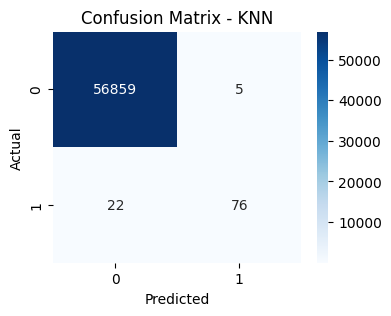

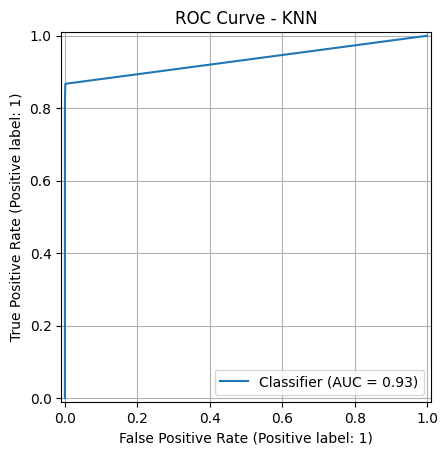

In [31]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("📌 K-Nearest Neighbors")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")

results["KNN"] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "AUC": auc}
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - KNN")
plt.grid(True)
plt.show()

KNN adalah model berbasis instance yang mengklasifikasikan data baru berdasarkan mayoritas label dari k tetangga terdekatnya. Jarak (biasanya Euclidean) digunakan untuk menentukan kedekatan antar titik. Model ini sangat intuitif dan non-parametrik, namun kurang efisien pada dataset besar karena proses prediksi dilakukan saat inferensi (lazy learner). KNN juga sensitif terhadap skala data, sehingga normalisasi sangat disarankan.

# Bagging Classifier

📌 Bagging Classifier
Accuracy : 1.00
Precision: 0.94
Recall   : 0.77
F1 Score : 0.84
AUC      : 0.93


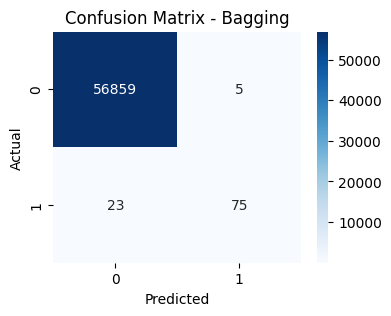

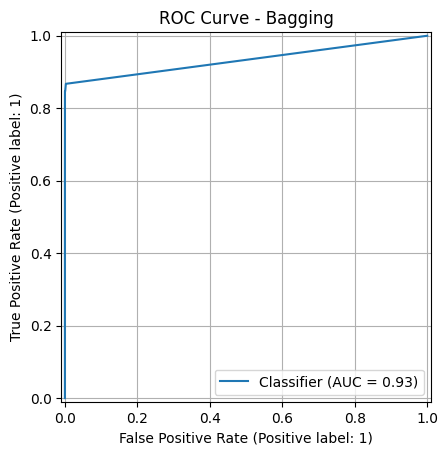

In [32]:
model = BaggingClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("📌 Bagging Classifier")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")

results["Bagging"] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "AUC": auc}
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Bagging")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - Bagging")
plt.grid(True)
plt.show()

Bagging (Bootstrap Aggregating) adalah teknik ensemble yang melatih banyak model dasar (biasanya decision tree) pada subset data yang diambil secara acak dengan pengembalian. Prediksi akhir diambil dari voting mayoritas (untuk klasifikasi). Tujuan utama bagging adalah mengurangi variansi dan meningkatkan stabilitas model. Model ini sangat efektif untuk model dasar yang cenderung overfitting, seperti decision tree.

# AdaBoost

📌 AdaBoost Classifier
Accuracy : 1.00
Precision: 0.79
Recall   : 0.68
F1 Score : 0.73
AUC      : 0.98


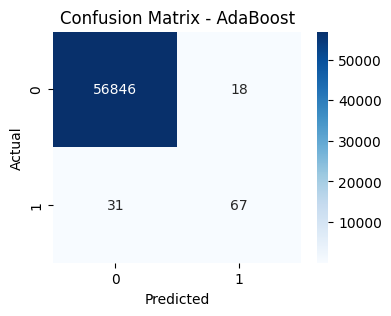

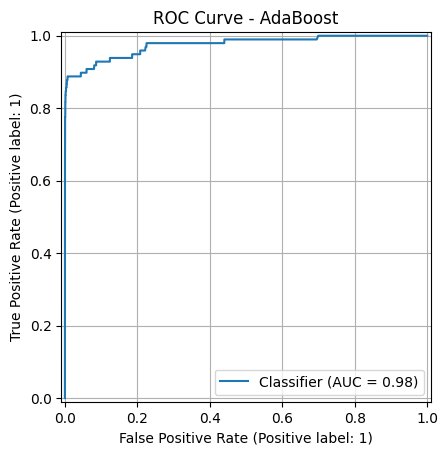

In [33]:
model = AdaBoostClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("📌 AdaBoost Classifier")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")

results["AdaBoost"] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "AUC": auc}
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - AdaBoost")
plt.grid(True)
plt.show()

AdaBoost bekerja dengan melatih model lemah secara berurutan, di mana setiap model berikutnya fokus pada kesalahan yang dibuat oleh model sebelumnya. Model akhir adalah gabungan dari semua model lemah dengan bobot yang diberikan berdasarkan performanya. AdaBoost efektif untuk meningkatkan akurasi model lemah, tetapi sensitif terhadap outlier dan noise. Biasanya digunakan dengan decision stump (tree 1-level) sebagai model dasarnya.

# SVC

📌 Support Vector Classifier
Accuracy : 1.00
Precision: 0.97
Recall   : 0.62
F1 Score : 0.76
AUC      : 0.96


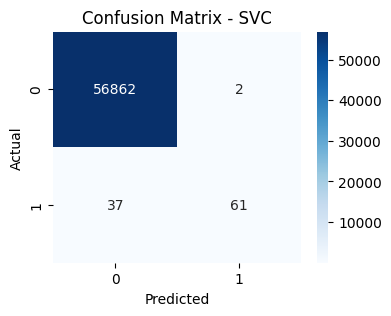

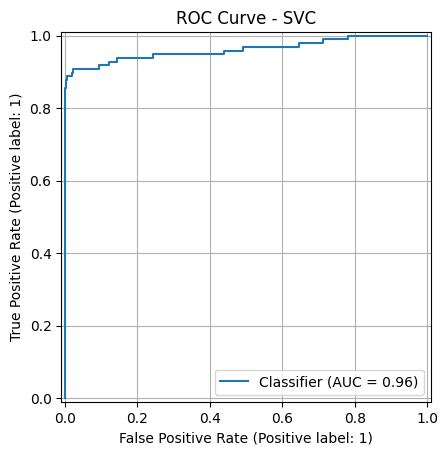

In [34]:
model = SVC(probability=True)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("📌 Support Vector Classifier")
print(f"Accuracy : {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall   : {rec:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")

results["SVC"] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "AUC": auc}
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve - SVC")
plt.grid(True)
plt.show()

SVC menggunakan prinsip margin maksimal untuk memisahkan kelas. Ia mencari hyperplane optimal yang memaksimalkan jarak antara kelas berbeda. Dengan bantuan kernel trick, SVC dapat menangani data non-linear dengan sangat baik. Meski akurat dan cocok untuk dataset kecil hingga menengah, SVC bisa lambat saat bekerja dengan dataset besar dan membutuhkan tuning hyperparameter yang teliti (misalnya C, kernel, dan gamma).

In [35]:
import pandas as pd

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values("F1", ascending=False)

print("📊 Ringkasan Evaluasi Model Klasifikasi:")
display(results_df)

📊 Ringkasan Evaluasi Model Klasifikasi:


,Accuracy,Precision,Recall,F1,AUC
KNN,0.999526,0.938272,0.775510,0.849162,0.933560
Bagging,0.999508,0.937500,0.765306,0.842697,0.933452
Decision Tree,0.999192,0.760000,0.775510,0.767677,0.887544
SVC,0.999315,0.968254,0.622449,0.757764,0.961881
AdaBoost,0.999140,0.788235,0.683673,0.732240,0.975455
Logistic Regression,0.999070,0.846154,0.561224,0.674847,0.975861


Dari 6 model di atas, semuanya memiliki akurasi data yang tinggi yang kemungkinan terjadi karena adanya imbalance pada data target 0 dan 1. Dari matriks evaluasi model, model terbaik adalah KNN yang memiliki F1 score tertinggi. Tidak hanya itu juga, AUC, precision, dan recallnya tinggi juga.